In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Need to update required libraries first

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we have to read csv file to get the dataset to proceed further

In [4]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Need to check the null values from the dataset so that we can proceed next

In [6]:
df['Date'].fillna(df['Date'].mode()[0], inplace=True)

In [7]:
df= df.rename(columns={'Unnamed: 0': 'Id_number'})
print(df)

       Id_number        Date  AveragePrice  Total Volume     4046       4225  \
0            0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1            1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2            2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3            3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4            4.0  29-11-2015          1.28      51039.60   941.48   43838.39   
...          ...         ...           ...           ...      ...        ...   
16463        NaN  05-04-2015           NaN           NaN      NaN        NaN   
16464        NaN  05-04-2015           NaN           NaN      NaN        NaN   
16465        NaN  05-04-2015           NaN           NaN      NaN        NaN   
16466        NaN  05-04-2015           NaN           NaN      NaN        NaN   
16467        NaN  05-04-2015           NaN           NaN      NaN        NaN   

         4770  Total Bags  Small Bags  

Here I have rename the column unnamed as ID_number

In [8]:
df.shape

(16468, 14)

In [9]:
df['Id_number'].fillna(df['Id_number'].mode()[0], inplace=True)

In [10]:
df['AveragePrice'].fillna(df['AveragePrice'].mode()[0], inplace=True)

In [11]:
df['Total Volume'].fillna(df['Total Volume'].mode()[0], inplace=True)

In [12]:
df['4046'].fillna(df['4046'].mode()[0], inplace=True)

In [13]:
df['4225'].fillna(df['4225'].mode()[0], inplace=True)

In [14]:
df['4770'].fillna(df['4770'].mode()[0], inplace=True)

In [15]:
df['Total Bags'].fillna(df['Total Bags'].mode()[0], inplace=True)

In [16]:
df['Small Bags'].fillna(df['Small Bags'].mode()[0], inplace=True)

In [17]:
df['Large Bags'].fillna(df['Large Bags'].mode()[0], inplace=True)

In [18]:
df['XLarge Bags'].fillna(df['XLarge Bags'].mode()[0], inplace=True)

In [19]:
df['type'].fillna(df['type'].mode()[0], inplace=True)

In [20]:
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [21]:
df['region'].fillna(df['region'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

Id_number       0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now we have removed all the null values from the dataset so that we can continue with or dataset to get the result

In [23]:
df.head()

,Id_number,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [24]:
df.describe()

,Id_number,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,16468.000000,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000
mean,36.078394,1.079538,1.827431e+05,5.997330e+04,5.794388e+04,4.695622e+03,3.005232e+04,2.592323e+04,3.928102e+03,200.980491,2015.014999
std,5.354318,0.057331,1.419030e+06,6.197685e+05,5.373405e+05,4.426855e+04,2.448275e+05,2.088886e+05,3.792962e+04,2348.549525,0.121551
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,37.000000,1.080000,3.875074e+04,4.677200e+02,1.783770e+03,5.768000e+01,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
50%,37.000000,1.080000,3.875074e+04,4.677200e+02,1.783770e+03,5.768000e+01,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
75%,37.000000,1.080000,3.875074e+04,4.677200e+02,1.783770e+03,5.768000e+01,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Here we are using describe to describe the dataset

In [25]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Date', 'type', 'region']


Numerical Columns:  ['Id_number', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


Now we need to check all the data type. As we cannot proceed further with strings therefore we need to convert the categorical data into numerical

<AxesSubplot:>

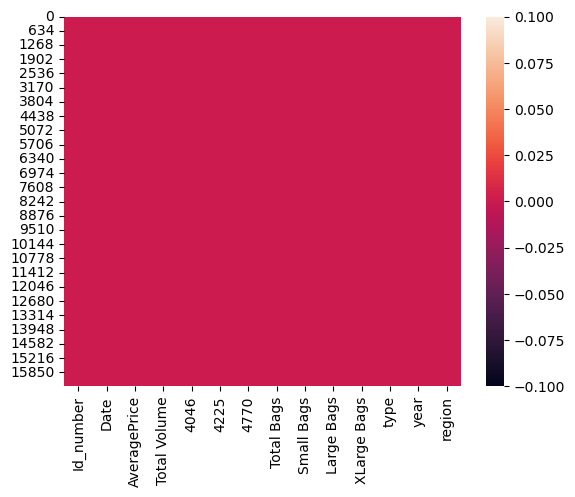

In [26]:
sns.heatmap(df.isnull())

Now we are representing dataset with heatmap

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [31]:
df.skew()

Id_number       -4.509178
AveragePrice    -0.597853
Total Volume    20.170327
4046            19.927599
4225            20.602074
4770            17.848307
Total Bags      17.606810
Small Bags      17.606449
Large Bags      17.157423
XLarge Bags     19.392479
year             7.981159
dtype: float64

Need to check the skewness of the dataset. So here above we can see that our data is highly skewed which needs to be reduced to get better result. 

In [32]:
df['Id_number'] = np.cbrt(df['Id_number'])

In [33]:
df['AveragePrice'] = np.cbrt(df['AveragePrice'])

In [34]:
df['Total Volume'] = np.cbrt(df['Total Volume'])

In [35]:
df['4046'] = np.cbrt(df['4046'])

In [36]:
df['4225'] = np.cbrt(df['4225'])

In [37]:
df['4770'] = np.cbrt(df['4770'])

In [38]:
df['Total Bags'] = np.cbrt(df['Total Bags'])

In [39]:
df['Small Bags'] = np.cbrt(df['Small Bags'])

In [40]:
df['Large Bags'] = np.cbrt(df['Large Bags'])

In [41]:
df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])

In [42]:
df['year'] = np.cbrt(df['year'])

Here we are reducing the skewness from the dataset to get better result

In [43]:
df.skew()

Id_number      -6.712126
AveragePrice   -2.654543
Total Volume    6.791526
4046            6.237455
4225            5.706705
4770            6.085205
Total Bags      6.145840
Small Bags      6.294046
Large Bags      5.716341
XLarge Bags     8.128755
year            7.981159
dtype: float64

In [44]:
df['Id_number'] = np.cbrt(df['Id_number'])
df['AveragePrice'] = np.cbrt(df['AveragePrice'])
df['Total Volume'] = np.cbrt(df['Total Volume'])
df['Total Volume'] = np.cbrt(df['Total Volume'])
df['4046'] = np.cbrt(df['4046'])
df['4225'] = np.cbrt(df['4225'])
df['4770'] = np.cbrt(df['4770'])
df['Total Bags'] = np.cbrt(df['Total Bags'])
df['Small Bags'] = np.cbrt(df['Small Bags'])
df['Large Bags'] = np.cbrt(df['Large Bags'])
df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])
df['year'] = np.cbrt(df['year'])

In [45]:
df.skew()

Id_number      -14.024446
AveragePrice    -3.343873
Total Volume     4.416507
4046             4.104639
4225             3.934897
4770             4.204960
Total Bags       4.211769
Small Bags       4.338968
Large Bags       3.376438
XLarge Bags      5.078935
year             7.981159
dtype: float64

In [46]:
df['Id_number'] = np.cbrt(df['Id_number'])
df['AveragePrice'] = np.cbrt(df['AveragePrice'])
df['Total Volume'] = np.cbrt(df['Total Volume'])
df['Total Volume'] = np.cbrt(df['Total Volume'])
df['4046'] = np.cbrt(df['4046'])
df['4225'] = np.cbrt(df['4225'])
df['4770'] = np.cbrt(df['4770'])
df['Total Bags'] = np.cbrt(df['Total Bags'])
df['Small Bags'] = np.cbrt(df['Small Bags'])
df['Large Bags'] = np.cbrt(df['Large Bags'])
df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])
df['year'] = np.cbrt(df['year'])

In [47]:
df.skew()

Id_number      -22.280559
AveragePrice    -3.573786
Total Volume     4.275442
4046             3.753729
4225             3.633123
4770             3.560157
Total Bags       3.852261
Small Bags       3.967410
Large Bags       3.047611
XLarge Bags      4.541681
year             7.981159
dtype: float64

Here we have tried our best to reduce the skewness from the dataset

In [48]:
df.drop(['Id_number'], axis=1, inplace=True)


In [49]:
df.drop(['Date'], axis=1, inplace=True)


In [50]:
df.drop(['type'], axis=1, inplace=True)


In [51]:
df.drop(['year'], axis=1, inplace=True)


In [54]:
df.drop(['region'], axis=1, inplace=True)


Here we have drop the above columns from the datset to get the better result

In [55]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000
mean,1.002784,1.045414,1.280112,1.341253,1.181968,1.366391,1.365416,0.115985,0.054731
std,0.002109,0.003610,0.086289,0.074488,0.074614,0.056463,0.053754,0.384802,0.257480
min,0.973926,1.044436,1.255707,1.319532,0.000000,1.350121,1.350121,0.000000,0.000000
25%,1.002854,1.044436,1.255707,1.319532,1.162046,1.350121,1.350121,0.000000,0.000000
50%,1.002854,1.044436,1.255707,1.319532,1.162046,1.350121,1.350121,0.000000,0.000000
75%,1.002854,1.044436,1.255707,1.319532,1.162046,1.350121,1.350121,0.000000,0.000000
max,1.019400,1.075179,1.860059,1.860144,1.688187,1.790212,1.781373,1.675176,1.536151


In [56]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.010618,1.046611,1.293277,1.497645,1.154308,1.399273,1.398714,1.182905,0.0
1,1.011177,1.045933,1.272834,1.486660,1.162528,1.403888,1.403352,1.184855,0.0
2,0.997316,1.049241,1.280604,1.536715,1.197722,1.395881,1.395223,1.187330,0.0
3,1.002854,1.047502,1.297494,1.513199,1.171977,1.378533,1.377344,1.198817,0.0
4,1.009185,1.045621,1.288668,1.485664,1.173851,1.381711,1.380049,1.216288,0.0


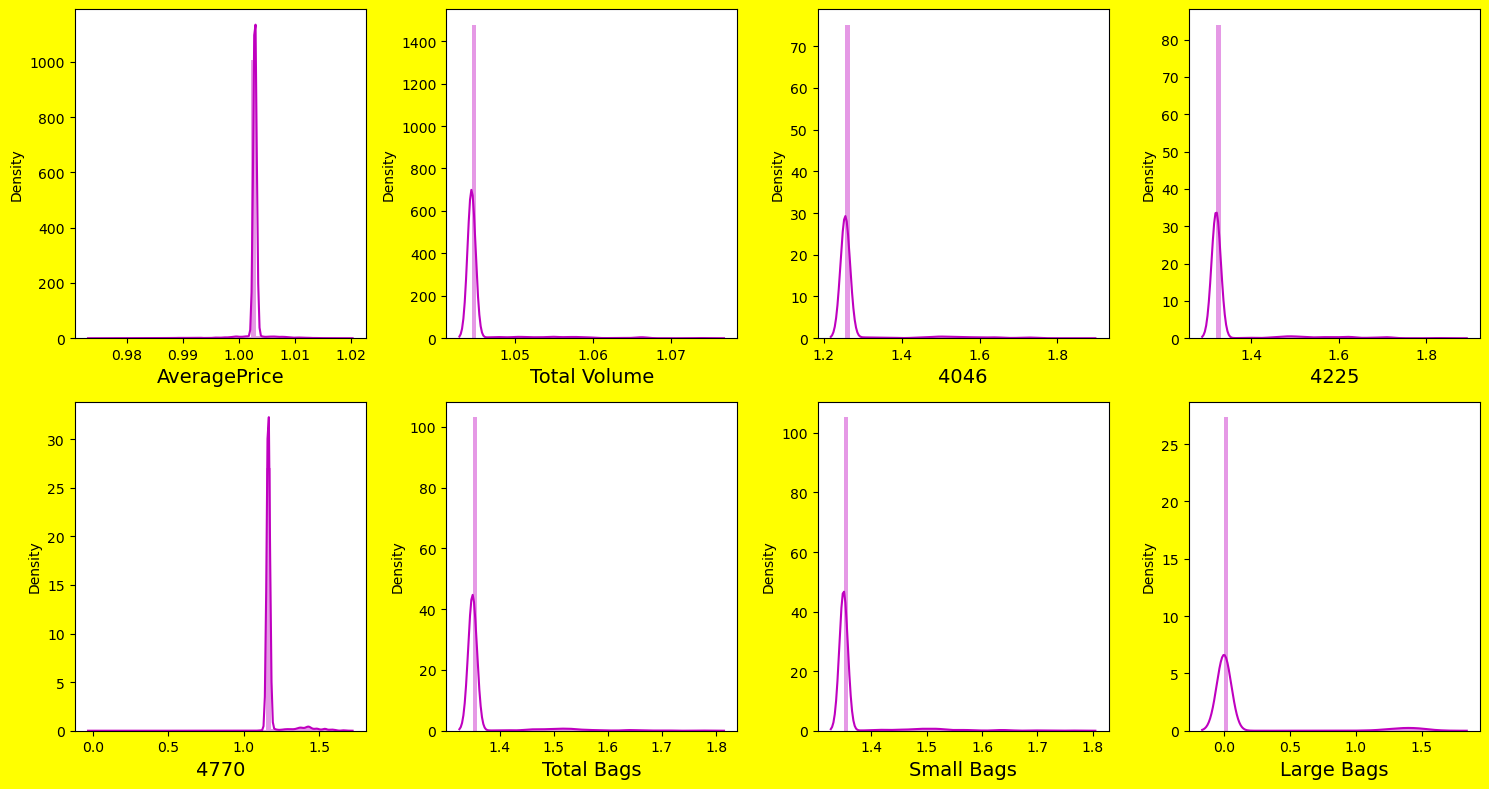

In [58]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Now we are representing the dataset by using distplot so that we can easily verify the skewnes of the dataset

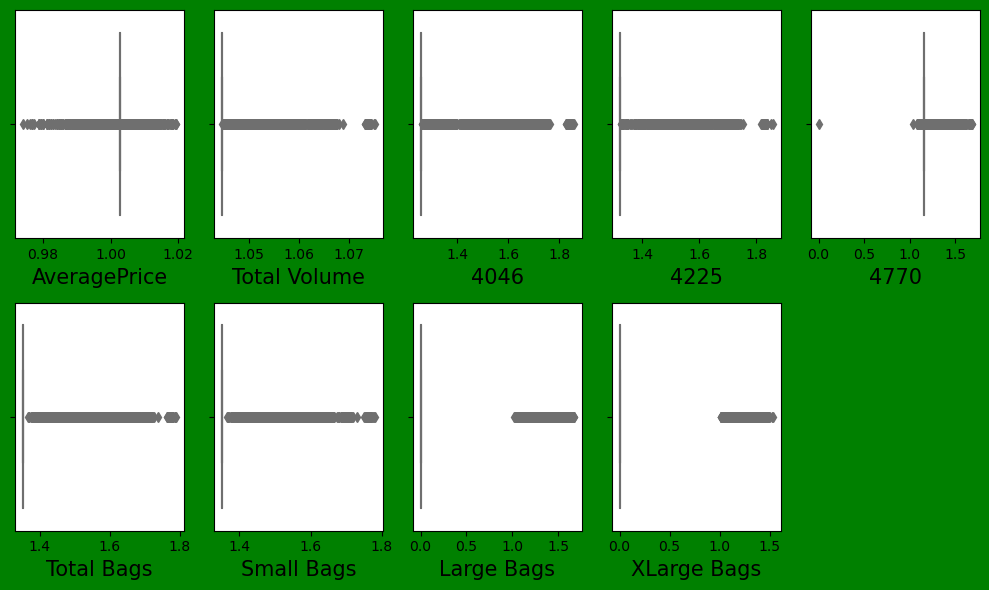

In [59]:
plt.figure(figsize=(10,6), facecolor= 'green')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Above boxplot represent the datset to verify the skewness and outliers

In [60]:
cor= df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.258839,-0.324378,-0.148732,-0.214471,-0.172718,-0.158709,-0.146001,-0.115292
Total Volume,-0.258839,1.000000,0.944857,0.969022,0.897139,0.980026,0.978616,0.875070,0.709710
4046,-0.324378,0.944857,1.000000,0.903615,0.889917,0.935768,0.925776,0.893581,0.692933
4225,-0.148732,0.969022,0.903615,1.000000,0.892555,0.975027,0.973921,0.908668,0.705782
4770,-0.214471,0.897139,0.889917,0.892555,1.000000,0.896045,0.897099,0.842801,0.757734
Total Bags,-0.172718,0.980026,0.935768,0.975027,0.896045,1.000000,0.997082,0.912482,0.737127
Small Bags,-0.158709,0.978616,0.925776,0.973921,0.897099,0.997082,1.000000,0.895299,0.734165
Large Bags,-0.146001,0.875070,0.893581,0.908668,0.842801,0.912482,0.895299,1.000000,0.677683
XLarge Bags,-0.115292,0.709710,0.692933,0.705782,0.757734,0.737127,0.734165,0.677683,1.000000


We need to check the correlation between the dataset

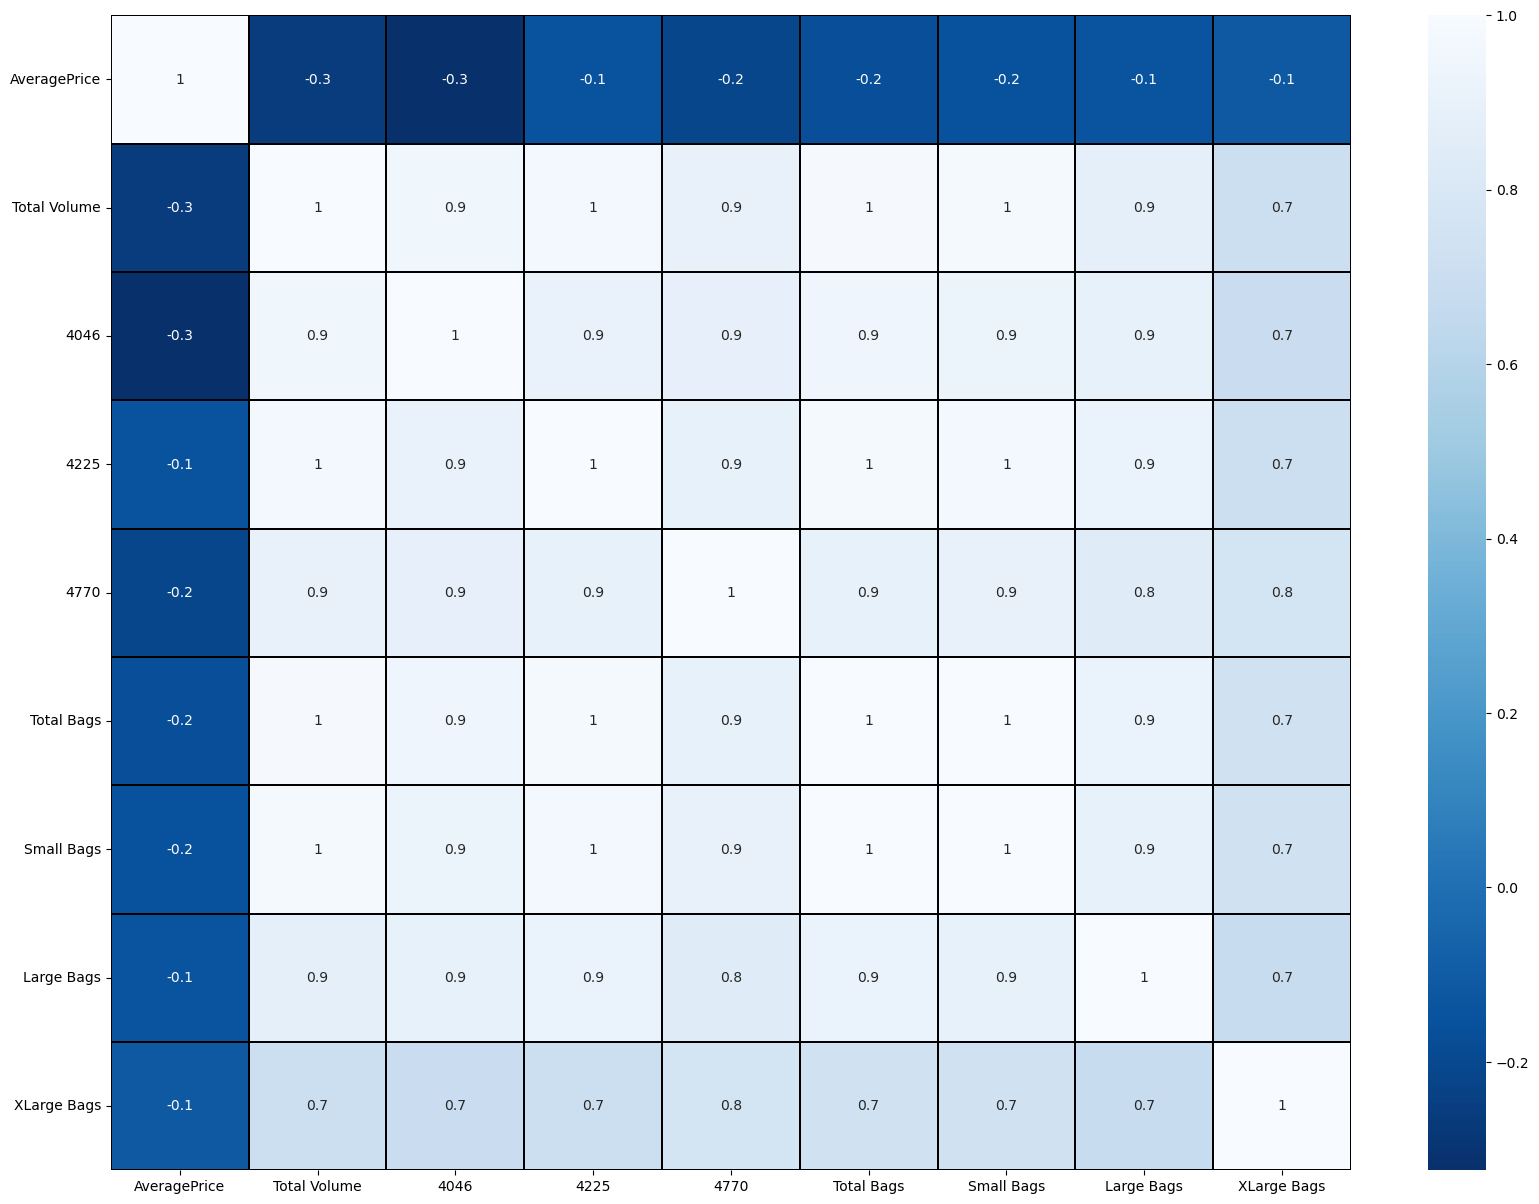

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Above heatmap is also reflecting the correlation between the dataset

In [62]:
x=df.drop("AveragePrice", axis=1)
y=df["AveragePrice"]

Now we have to drop the target variable 

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.331359,0.152570,2.099625,-0.370714,0.582362,0.619464,2.772732,-0.212571
1,0.143534,-0.084344,1.952148,-0.260545,0.664108,0.705751,2.777799,-0.212571
2,1.060024,0.005704,2.624168,0.211147,0.522299,0.554512,2.784230,-0.212571
3,0.578163,0.201447,2.308445,-0.133900,0.215039,0.221909,2.814083,-0.212571
4,0.057114,0.099161,1.938777,-0.108780,0.271329,0.272232,2.859488,-0.212571
...,...,...,...,...,...,...,...,...
16463,-0.271026,-0.282835,-0.291618,-0.267010,-0.288173,-0.284555,-0.301424,-0.212571
16464,-0.271026,-0.282835,-0.291618,-0.267010,-0.288173,-0.284555,-0.301424,-0.212571
16465,-0.271026,-0.282835,-0.291618,-0.267010,-0.288173,-0.284555,-0.301424,-0.212571
16466,-0.271026,-0.282835,-0.291618,-0.267010,-0.288173,-0.284555,-0.301424,-0.212571


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 2.8632244240219878e-06
R-squared (R2) Score: 0.30960675578903585


Creating the models for the dataset

In [74]:
import joblib
joblib.dump(model,"AveragePrice.pkl")

['AveragePrice.pkl']

In [75]:
model = joblib.load("AveragePrice.pkl")
prediction = model.predict(X_test)
prediction

array([1.0028462, 1.0028462, 1.0028462, ..., 1.0028462, 1.0028462,
       1.0028462])

In [76]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,1.002846,1.002854
1,1.002846,1.002854
2,1.002846,1.002854
3,1.002846,1.002854
4,1.002846,1.002854
...,...,...
3289,1.002846,1.002854
3290,1.002846,1.002854
3291,1.002846,1.002854
3292,1.002846,1.002854


Finally we have predicted the average price in our dataset